In [1]:
# Prueba de hipótesis chi-square.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

In [2]:
path = "../datos/"
fname = "Tabla_A2_ppt_Ithaca.dat"

# Se lee el archivo .dat y se ajusta su formato.
df = pd.read_table(path + fname, names = ["Year", "Precipitation"])
df = df.set_index("Year")

df.head()

,Precipitation
Year,
1933,0.44
1934,1.18
1935,2.69
1936,2.08
1937,3.66


In [4]:
# Ajuste de parámetros.

alpha, zeta, beta = stats.gamma.fit(
    df["Precipitation"], loc = 0)
mu, sigma = stats.norm.fit(df["Precipitation"])

In [5]:
# Histograma de datos observados.

bins_lim = [0, 1, 1.5, 2, 2.5, 3,
    df["Precipitation"].max()
    ]

n_obs, bins = np.histogram( df["Precipitation"],
    bins = bins_lim )

# Se discretizan las distribuciones continuas.

n_norm = n_obs.sum() * np.array( [
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[2], mu, sigma) -
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[3], mu, sigma) -
    stats.norm.cdf(bins_lim[2], mu, sigma),
    stats.norm.cdf(bins_lim[4], mu, sigma) -
    stats.norm.cdf(bins_lim[3], mu, sigma),
    stats.norm.cdf(bins_lim[5], mu, sigma) -
    stats.norm.cdf(bins_lim[4], mu, sigma),
    stats.norm.sf(bins_lim[5], mu, sigma) 
] )

n_gamma = n_obs.sum() * np.array( [
    stats.gamma.cdf(bins_lim[1], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[2], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[1], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[3], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[2], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[4], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[3], alpha, zeta, beta),
    stats.gamma.cdf(bins_lim[5], alpha, zeta, beta) -
    stats.gamma.cdf(bins_lim[4], alpha, zeta, beta),
    stats.gamma.sf(bins_lim[5], alpha, zeta, beta) 
] )

(0.0, 0.672)

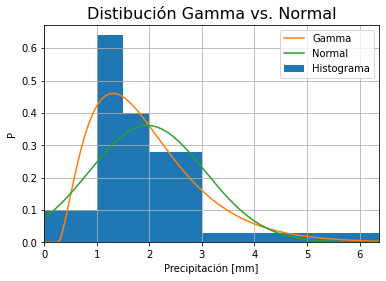

In [6]:
# Graficamos los datos y las distribuciones.

fig, ax = plt.subplots()

df["Precipitation"].hist( bins = bins_lim,
    density = True, ax = ax )

x = np.linspace(0, df["Precipitation"].max(), 1000)
y_1 = stats.gamma.pdf(x, alpha, zeta, beta)
y_2 = stats.norm.pdf(x, mu, sigma)

ax.plot(x, y_1)
ax.plot(x, y_2)

ax.set_title("Distibución Gamma vs. Normal",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Gamma", "Normal", "Histograma"])
ax.set_xlim(0, bins[-1])
ax.set_ylim(0)

In [7]:
# Prueba chi-square.

chi_norm = stats.chisquare(
    n_obs, n_norm, ddof = 2)
chi_gamma = stats.chisquare(
    n_obs, n_gamma, ddof = 2)

print("Chi-square")
print()
print("Normal")
print(f"Chi-square: {chi_norm.statistic:.2f}")
print(f"p: {chi_norm.pvalue:.4f}")
print()
print("Gamma")
print(f"Chi-square: {chi_gamma.statistic:.2f}")
print(f"p: {chi_gamma.pvalue:.4f}")

Chi-square

Normal
Chi-square: 14.60
p: 0.0022

Gamma
Chi-square: 4.92
p: 0.1775
